In [1]:
import torch
import torchvision
from torchvision.datasets import OxfordIIITPet
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
from collections import Counter
import os
import json 

# Verify MPS is available
print(f"PyTorch version: {torch.__version__}")
print(f"MPS available: {torch.backends.mps.is_available()}")

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)


PyTorch version: 2.9.0
MPS available: True


In [2]:
data_root = os.path.expanduser('~/datasets/oxford-iiit-pet')

#Load data with segmentation mask
try:
    dataset = OxfordIIITPet(
        root=data_root,
        split='trainval',
        target_types='segmentation',
        download= True
    )
    print(f"✓ Loaded {len(dataset)} images")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print(f"Trying alternative path...")

print(os.listdir(data_root))
print("Images:", len(os.listdir(f"{data_root}/oxford-iiit-pet/images")))
print("Trimaps:", len(os.listdir(f"{data_root}/oxford-iiit-pet/annotations/trimaps")))

100%|████████████████████████████████████| 792M/792M [02:12<00:00, 5.97MB/s]
100%|██████████████████████████████████| 19.2M/19.2M [00:04<00:00, 4.42MB/s]


✓ Loaded 3680 images
['oxford-iiit-pet']
Images: 7393
Trimaps: 14780


In [11]:
import os
from torchvision.datasets import OxfordIIITPet

data_root = os.path.expanduser("~/datasets/oxford-iiit-pet")  

dataset = OxfordIIITPet(
    root=data_root,
    split='trainval',
    target_types='segmentation',
    download=False
)

print("Found", len(dataset), "images ✅")

Found 3680 images ✅


In [3]:
# Cell 3: Explore Dataset Structure
print("="*60)
print("DATASET STATISTICS")
print("="*60)

# Check classes
print(f"Number of samples: {len(dataset)}")
print(f"Number of classes: {len(dataset.classes)}")
print(f"\nFirst 10 classes: {dataset.classes[:10]}")

# Check class distribution
class_indices = [dataset._labels[i] for i in range(len(dataset))]
class_counts = Counter(class_indices)
print(f"\nClass distribution (first 10):")
for class_idx, count in sorted(class_counts.items())[:10]:
    class_name = dataset.classes[class_idx]
    print(f"  {class_name}: {count} images")


DATASET STATISTICS
Number of samples: 3680
Number of classes: 37

First 10 classes: ['Abyssinian', 'American Bulldog', 'American Pit Bull Terrier', 'Basset Hound', 'Beagle', 'Bengal', 'Birman', 'Bombay', 'Boxer', 'British Shorthair']

Class distribution (first 10):
  Abyssinian: 100 images
  American Bulldog: 100 images
  American Pit Bull Terrier: 100 images
  Basset Hound: 100 images
  Beagle: 100 images
  Bengal: 100 images
  Birman: 100 images
  Bombay: 96 images
  Boxer: 100 images
  British Shorthair: 100 images



SAMPLE VISUALIZATIONS
Saved to ../experiments/results/visualizations/sample_0.png


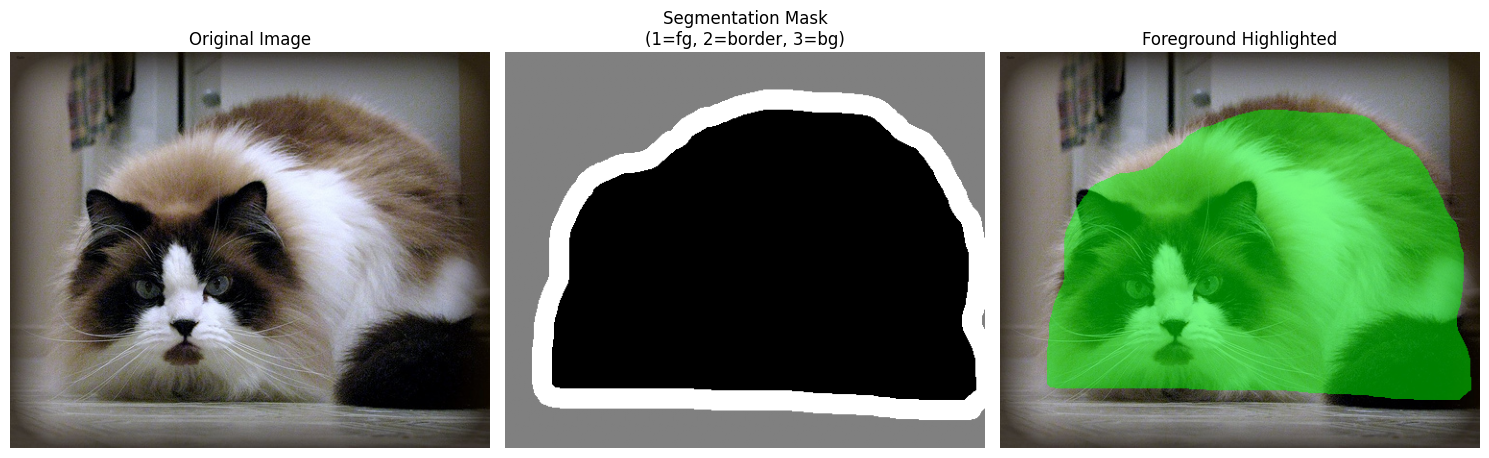

Sample 3174: Ragdoll
Image shape: (412, 500, 3)
Mask shape: (412, 500)
Mask values: [1 2 3]


Saved to ../experiments/results/visualizations/sample_1.png


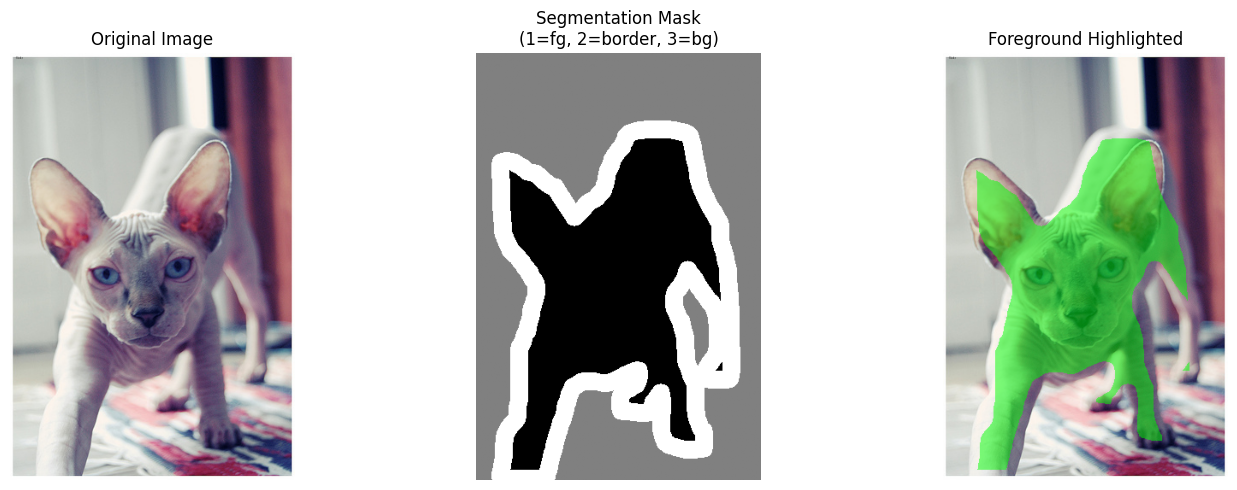

Sample 3507: Sphynx
Image shape: (500, 333, 3)
Mask shape: (500, 333)
Mask values: [1 2 3]


Saved to ../experiments/results/visualizations/sample_2.png


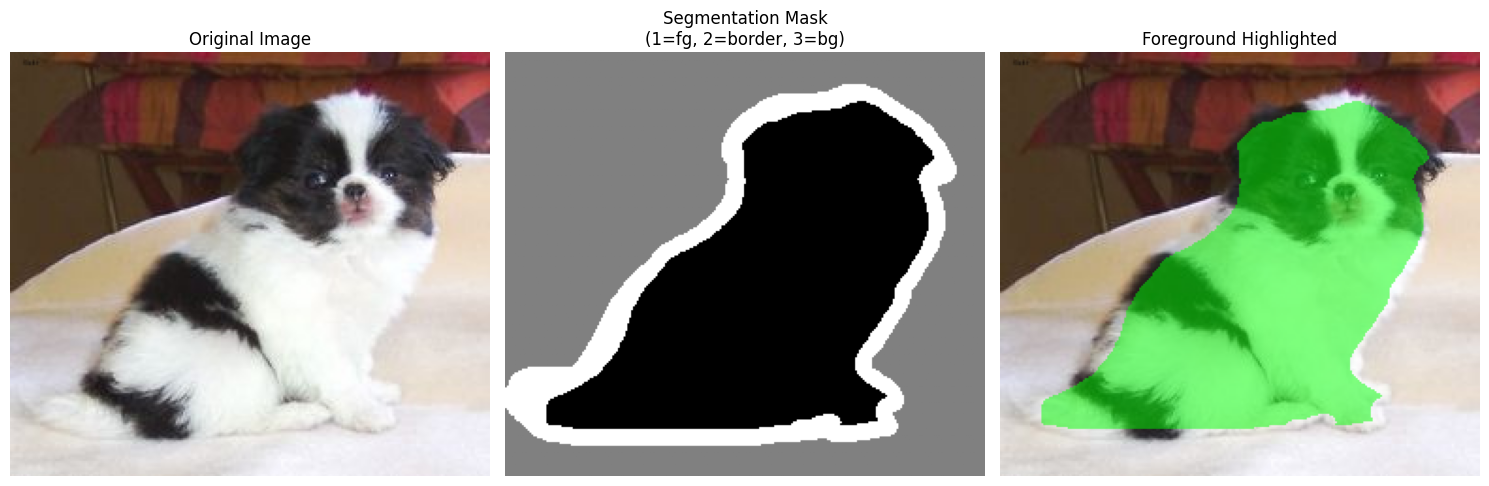

Sample 860: Japanese Chin
Image shape: (225, 255, 3)
Mask shape: (225, 255)
Mask values: [1 2 3]


Saved to ../experiments/results/visualizations/sample_3.png


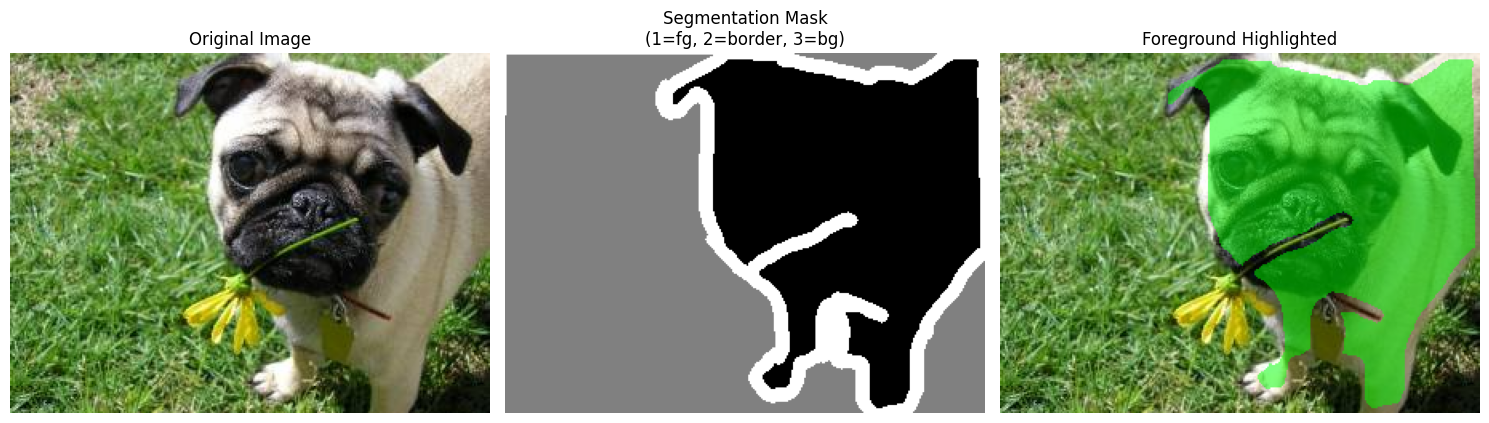

Sample 1294: Pug
Image shape: (225, 300, 3)
Mask shape: (225, 300)
Mask values: [1 2 3]


Saved to ../experiments/results/visualizations/sample_4.png


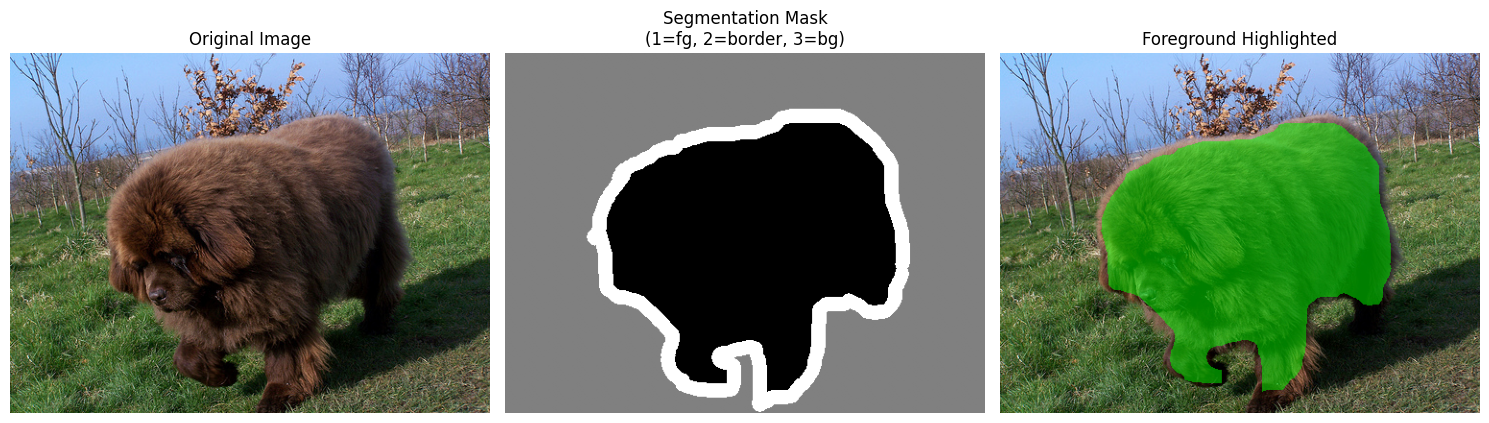

Sample 1130: Newfoundland
Image shape: (375, 500, 3)
Mask shape: (375, 500)
Mask values: [1 2 3]




In [4]:
# Cell 4: Visualize Sample Images with Masks
def visualize_sample(dataset, idx, save_path=None):
    """Visualize image and its segmentation mask"""
    image, mask = dataset[idx]
    
    # Convert to numpy
    image_np = np.array(image)
    mask_np = np.array(mask)
    
    # Create visualization
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original image
    axes[0].imshow(image_np)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    # Segmentation mask
    axes[1].imshow(mask_np, cmap='gray')
    axes[1].set_title('Segmentation Mask\n(1=fg, 2=border, 3=bg)')
    axes[1].axis('off')
    
    # Overlay
    overlay = image_np.copy()
    # Highlight foreground in green
    foreground_mask = (mask_np == 1)
    if foreground_mask.any():
        overlay[foreground_mask] = (overlay[foreground_mask] * 0.5 + np.array([0, 255, 0]) * 0.5).astype(np.uint8)
    
    axes[2].imshow(overlay.astype(np.uint8))
    axes[2].set_title('Foreground Highlighted')
    axes[2].axis('off')
    
    plt.tight_layout()
    
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
        print(f"Saved to {save_path}")
    
    plt.show()
    
    # Print info
    class_idx = dataset._labels[idx]
    class_name = dataset.classes[class_idx]
    print(f"Sample {idx}: {class_name}")
    print(f"Image shape: {image_np.shape}")
    print(f"Mask shape: {mask_np.shape}")
    print(f"Mask values: {np.unique(mask_np)}")

# Visualize 5 random samples
print("\n" + "="*60)
print("SAMPLE VISUALIZATIONS")
print("="*60)

for i in range(5):
    idx = np.random.randint(0, len(dataset))
    visualize_sample(dataset, idx, 
                    save_path=f'../experiments/results/visualizations/sample_{i}.png')
    print("\n")


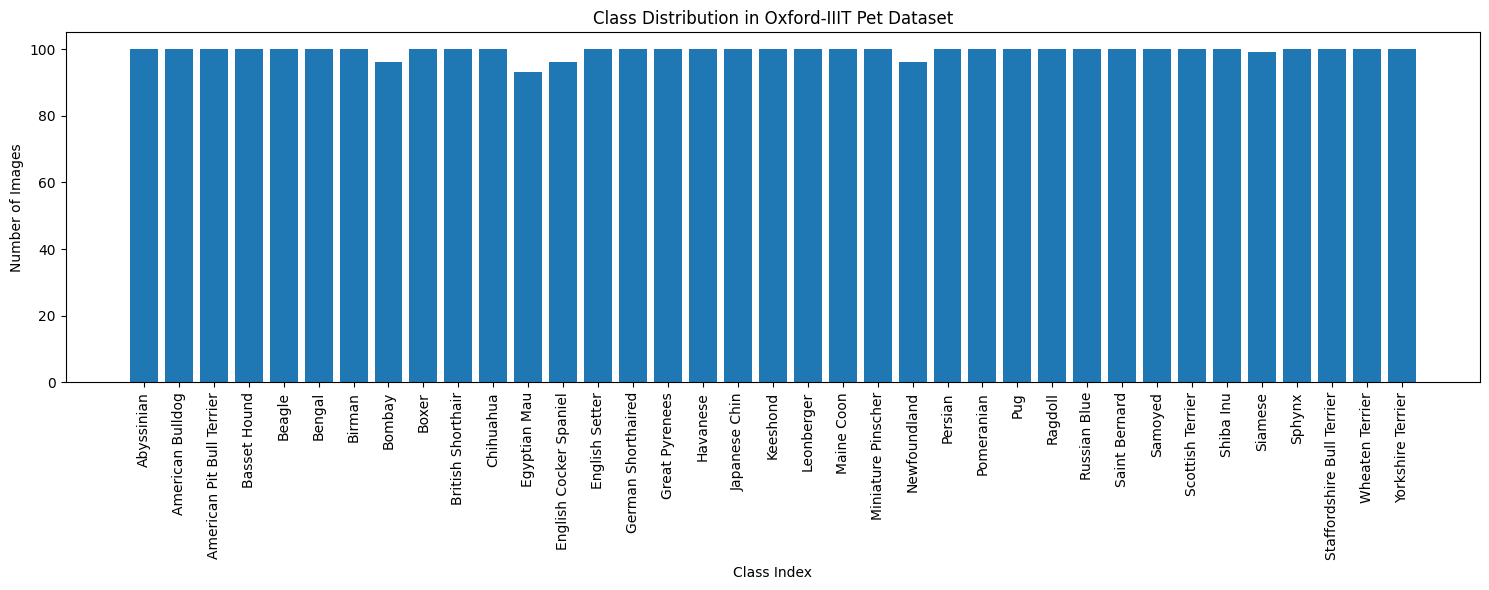

Most common class: Abyssinian (100 images)
Least common class: Egyptian Mau (93 images)
Average images per class: 99.5


In [5]:
# Cell 5: Analyze Class Balance
class_names = [dataset.classes[i] for i in range(len(dataset.classes))]
class_counts_list = [class_counts.get(i, 0) for i in range(len(dataset.classes))]

plt.figure(figsize=(15, 6))
plt.bar(range(len(class_names)), class_counts_list)
plt.xlabel('Class Index')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Oxford-IIIT Pet Dataset')
plt.xticks(range(len(class_names)), class_names, rotation=90)
plt.tight_layout()

os.makedirs('../experiments/results/visualizations', exist_ok=True)
plt.savefig('../experiments/results/visualizations/class_distribution.png', dpi=150)
plt.show()

# Statistics
print(f"Most common class: {dataset.classes[max(class_counts, key=class_counts.get)]} ({max(class_counts.values())} images)")
print(f"Least common class: {dataset.classes[min(class_counts, key=class_counts.get)]} ({min(class_counts.values())} images)")
print(f"Average images per class: {len(dataset) / len(dataset.classes):.1f}")


IMAGE & MASK ANALYSIS

Image dimensions (sampled 100 images):
  Most common width: (500, 49)
  Most common height: (500, 32)

Foreground ratio statistics:
  Mean: 29.19%
  Median: 26.38%
  Min: 0.00%
  Max: 68.92%


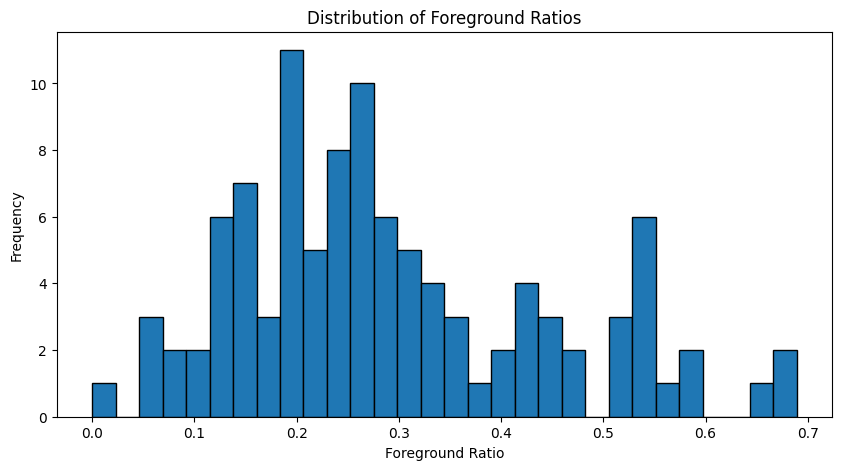

In [6]:
# Cell 6: Analyze Image and Mask Properties
print("="*60)
print("IMAGE & MASK ANALYSIS")
print("="*60)

sample_size = 100
image_sizes = []
foreground_ratios = []

for idx in range(0, len(dataset), len(dataset)//sample_size):
    image, mask = dataset[idx]
    
    # Image size
    image_sizes.append(image.size)
    
    # Foreground ratio
    mask_np = np.array(mask)
    foreground_pixels = (mask_np == 1).sum()
    total_pixels = mask_np.size
    foreground_ratios.append(foreground_pixels / total_pixels)

# Report statistics
width_counts = Counter([size[0] for size in image_sizes])
height_counts = Counter([size[1] for size in image_sizes])

print(f"\nImage dimensions (sampled {sample_size} images):")
print(f"  Most common width: {width_counts.most_common(1)[0]}")
print(f"  Most common height: {height_counts.most_common(1)[0]}")

print(f"\nForeground ratio statistics:")
print(f"  Mean: {np.mean(foreground_ratios):.2%}")
print(f"  Median: {np.median(foreground_ratios):.2%}")
print(f"  Min: {np.min(foreground_ratios):.2%}")
print(f"  Max: {np.max(foreground_ratios):.2%}")

# Plot foreground ratio distribution
plt.figure(figsize=(10, 5))
plt.hist(foreground_ratios, bins=30, edgecolor='black')
plt.xlabel('Foreground Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Foreground Ratios')
plt.savefig('../experiments/results/visualizations/foreground_ratio_dist.png', dpi=150)
plt.show()


In [7]:
# Cell 7: Create Train/Val Split & Save Metadata
# Create train/val split (80/20)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(
    dataset, 
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)
)

print("="*60)
print("TRAIN/VAL SPLIT")
print("="*60)
print(f"Total samples: {len(dataset)}")
print(f"Training samples: {len(train_dataset)} ({len(train_dataset)/len(dataset)*100:.1f}%)")
print(f"Validation samples: {len(val_dataset)} ({len(val_dataset)/len(dataset)*100:.1f}%)")

# Save split indices for reproducibility
split_info = {
    'total_size': len(dataset),
    'train_size': len(train_dataset),
    'val_size': len(val_dataset),
    'train_indices': train_dataset.indices,
    'val_indices': val_dataset.indices,
    'random_seed': 42
}

os.makedirs('../data/processed', exist_ok=True)
with open('../data/processed/split_metadata.json', 'w') as f:
    json.dump(split_info, f, indent=2)

print(f"\n✓ Split metadata saved to: ../data/processed/split_metadata.json")


TRAIN/VAL SPLIT
Total samples: 3680
Training samples: 2944 (80.0%)
Validation samples: 736 (20.0%)

✓ Split metadata saved to: ../data/processed/split_metadata.json


In [8]:
# Cell 8: Create Summary Report
summary = {
    'Dataset': 'Oxford-IIIT Pet',
    'Total Images': len(dataset),
    'Number of Classes': len(dataset.classes),
    'Training Samples': len(train_dataset),
    'Validation Samples': len(val_dataset),
    'Average Images per Class': f"{len(dataset) / len(dataset.classes):.1f}",
    'Most Common Class': dataset.classes[max(class_counts, key=class_counts.get)],
    'Least Common Class': dataset.classes[min(class_counts, key=class_counts.get)],
    'Average Foreground Ratio': f"{np.mean(foreground_ratios):.2%}",
    'Image Size Range': f"{min(width_counts.keys())}x{min(height_counts.keys())} to {max(width_counts.keys())}x{max(height_counts.keys())}"
}

print("\n" + "="*60)
print("DATASET SUMMARY")
print("="*60)
for key, value in summary.items():
    print(f"{key}: {value}")

# Save summary
os.makedirs('../experiments/results/metrics', exist_ok=True)
summary_df = pd.DataFrame([summary]).T
summary_df.columns = ['Value']
summary_df.to_csv('../experiments/results/metrics/dataset_summary.csv')
print(f"\n✓ Summary saved to: ../experiments/results/metrics/dataset_summary.csv")



DATASET SUMMARY
Dataset: Oxford-IIIT Pet
Total Images: 3680
Number of Classes: 37
Training Samples: 2944
Validation Samples: 736
Average Images per Class: 99.5
Most Common Class: Abyssinian
Least Common Class: Egyptian Mau
Average Foreground Ratio: 29.19%
Image Size Range: 200x145 to 700x500

✓ Summary saved to: ../experiments/results/metrics/dataset_summary.csv
